# Vaccination model

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import model
import pickle
import itertools
import networkx as nx
import geopandas as gp
from tqdm import tqdm, tqdm_notebook
import os
%matplotlib inline

### Prepare data and network

In [2]:
prep_data = model.data_and_network_prep()

## Grid Search

#### Load results

In [6]:
# Load parameteres
with open('../../data/coupled_model/parameters_updated.pickle', 'rb') as pickle_in:
    parameters = pickle.load(pickle_in)

parameters = parameters['v']

In [4]:
# with open('L:/Dor/Data/vaccination_model/grid_search_5_res.pickle', 'rb') as pickle_in:
#     grid_search_res_1 = pickle.load(pickle_in)
    
# with open('L:/Dor/Data/vaccination_model/grid_search_6_res.pickle', 'rb') as pickle_in:
#     grid_search_res_2 = pickle.load(pickle_in)

# with open('L:/Dor/Data/vaccination_model/grid_search_7_res.pickle', 'rb') as pickle_in:
#     grid_search_res_3 = pickle.load(pickle_in)
    
    
# grid_search_res = grid_search_res_1 + grid_search_res_2 + grid_search_res_3
# grid_search_res = grid_search_res_3

In [5]:
# with open('L:/Dor/Data/vaccination_model/grid_search/grid_search_res.pickle', 'rb') as pickle_in:
#     grid_search_res = pickle.load(pickle_in)

#### Get best parametrs according to each likelihood function

In [7]:
# Max likelihood 
liklihood = max(grid_search_res, key=lambda x: x['log_likelihood'])

# Max likelihood age
liklihood_age = max(grid_search_res, key=lambda x: x['log_likelihood_age']) ############### ONLY FROM 3!!!!!

# Max likelihood subdist
liklihood_subdist = max(grid_search_res, key=lambda x: x['log_likelihood_subdist'])

# # Min MSE age
# mse_age = min(grid_search_res, key=lambda x: x['mse_by_age'])

# # Min MSE subdsit
# mse_subdist = min(grid_search_res, key=lambda x: x['mse_by_subdist'])

print(f"Max likelihood: {int(liklihood['log_likelihood']):,d}")
print(liklihood)
print('\n')

print(f"Max likelihood by age: {int(liklihood_age['log_likelihood_age']):,d}")
print(liklihood_age)
print('\n')

print(f"Max likelihood by subdist: {int(liklihood_subdist['log_likelihood_subdist']):,d}")
print(liklihood_subdist)
print('\n')

# print(f"Min MSE by age: {int(mse_age['mse_by_age']):,d}")
# print(mse_age)
# print('\n')

# print(f"Min MSE by subdist: {int(mse_subdist['mse_by_subdist']):,d}")
# print(mse_subdist)
# print('\n')

Max likelihood: 23,071
{'parameters': {'beta': 0.016756750945707367, 'delta': 0.3443388493286961, 'gamma': 0.1993417472076366, 'I_0_size': 0.001}, 'log_likelihood': 23071.81001811438, 'log_likelihood_age': 93764.55600369164, 'log_likelihood_subdist': 64223.71598261965}


Max likelihood by age: 93,904
{'parameters': {'beta': 0.01884563814737423, 'delta': 0.26172954521450326, 'gamma': 0.22472063319422045, 'I_0_size': 0.001}, 'log_likelihood': 21982.02219440393, 'log_likelihood_age': 93904.92856521498, 'log_likelihood_subdist': 64027.33822967921}


Max likelihood by subdist: 64,237
{'parameters': {'beta': 0.016534620615599377, 'delta': 0.38356614902224223, 'gamma': 0.20840689843177979, 'I_0_size': 0.001}, 'log_likelihood': 22892.00914133095, 'log_likelihood_age': 93881.4253592024, 'log_likelihood_subdist': 64237.72970598607}




## Model instance - network

In [8]:
# Create data for the fit
data_for_fit = model.create_data_for_fit(prep_data)

#### Single  run

In [9]:
parameters

{'beta': 0.016534620615599377,
 'delta': 0.38356614902224223,
 'gamma': 0.20840689843177979,
 'I_0_size': 0.001}

In [38]:
# liklihood_subdist['parameters']['beta'] = 0.0163
# liklihood_subdist['parameters']['I_0_size'] = 0.001
# parameters['epsilon'] = 1

In [7]:
# # For 10% coverage
# parameters['beta'] = 0.01402
# # For 30% coverage
# parameters['beta'] = 0.0203
# # For 40% coverage
# parameters['beta'] = 0.025
# For 45 coverage
# parameters['beta'] = 0.028

In [10]:
model_results = model.run_model(parameters, prep_data)

In [63]:
y = [factorial(i) for i in data_for_fit['data_for_fit_subdist'][(51, 1)].vacc_count.values.astype(np.object)]
np.array(y).sum()

ValueError: factorial() only accepts integral values

In [52]:
factorial(854)

2769461110301175050652761350197023841883556872477497387537657300671716130144735211043739476988071980096814757645990820078903575206627615647095678328705446548474115722325435414414448759020220156078508999483727621426891356176343555537331789486299417227477452311193593802933238263433575115433491079964976289456714646444273398007834048014235959954926064994349995721755590079649227428706860431467687141446015374409190369992086961516563536556268954042364330491007623109714603322857280960848314335872836583254515455837570796594580668746994962261745352749627243727128747902515398063417710758252469416909367783132557392987000950653150426475696007301917730169994354895823765719354493060017501801795108616000451799634907973143141366851733532425545485625628274985528879331863652991436203778554447695880960407205020684407270338115680225902473530835388453135822538204010017477103066190975702370414578894836142574451378148027282859792382080897820419867270331529039809062901361462330619936856904302265184843893636443

In [55]:
factorial_vec(data_for_fit['data_for_fit_subdist'][(51, 1)].vacc_count.values.astype(np.int64))

OverflowError: Python int too large to convert to C long

In [39]:
likelihood_agg_by_subdist(model_results['lambdas'], data_for_fit['data_for_fit_subdist'], prep_data)

ValueError: factorial() only accepts integral values

In [35]:
a

array([7, 2, 3])

In [36]:
factorial_vec = np.vectorize(lambda x: factorial(x))
factorial_vec(a)

array([5040,    2,    6])

In [38]:
calc_weekly_lambdas_vacc = model.calc_weekly_lambdas_vacc

from math import factorial
factorial_vec = np.vectorize(lambda x: factorial(x))

def likelihood_agg_by_subdist(lambdas, data_for_fit, prep_data):
    relevant_subdists_age = prep_data['relevant_subdists_age']
    vaccination_coverage_with_age = prep_data['vaccination_coverage_with_age']
    day_in_season_short = prep_data['day_in_season_short']

    # Aggregate lambda by subdist
    # Initialize dict to all arrays of 0s
    season_len_weeks = list(data_for_fit.values())[0].shape[0]
    lambdas_subdist = {key: np.array([0] * season_len_weeks) for key in relevant_subdists_age}

    # Go over the clinics and age groups and aggregate according to the clinic's subdist
    for (clinic, age), cur_data in lambdas.items():
        # Get current subdist
        subdist = vaccination_coverage_with_age.loc[clinic].subdist[0]
        # Get weekly lambdas
        weekly_lambdas = calc_weekly_lambdas_vacc(cur_data)
        # Sum
        lambdas_subdist[(subdist, age)] = lambdas_subdist[(subdist, age)] + weekly_lambdas

    # Initialize a variable to sum the log-likelihood
    likelihood = 0

    # Go over the clinics
    for subdist, age in lambdas_subdist:
        # Sum the log-likelihood for each stage
        x = np.prod((np.exp(-lambdas_subdist[(subdist, age)]) * 
                    (lambdas_subdist[(subdist, age)])**(data_for_fit[(subdist, age)].vacc_count.values)) /
                   factorial_vec(data_for_fit[(subdist, age)].vacc_count.values))
        print (x)
#         log_like += np.sum(-lambdas_subdist[(subdist, age)] + 1e-10 +
#                            data_for_fit[(subdist, age)].vacc_count.values * np.log(lambdas_subdist[(subdist, age)] + 1e-10))

    return likelihood

In [64]:
np.prod(a)

42

In [19]:
a = np.array([7,2,3])
b = np.array([0,1,2])
a**b

array([1, 2, 9], dtype=int32)

In [15]:
model_results_list = [model.run_model(parameters, prep_data) for i in tqdm(range(30))]

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:31<00:00, 11.06s/it]


In [16]:
xx = np.array([model.get_vaccination_coverage_by_age(res, data_for_fit, prep_data).iloc[2,1] for res in model_results_list])
xx.mean()

0.45002635794083656

In [17]:
xx[np.argsort(xx[len(xx) // 2])][0]

0.44639200340625695

In [18]:
xx

array([0.446392  , 0.4498084 , 0.44822692, 0.44727398, 0.45214006,
       0.45244419, 0.44643255, 0.45090327, 0.4497273 , 0.44929138,
       0.44864257, 0.44336084, 0.44724357, 0.44728412, 0.44961578,
       0.45397498, 0.45264695, 0.44638187, 0.45447173, 0.45372154,
       0.45156221, 0.44976785, 0.45331603, 0.45364044, 0.44636159,
       0.45255571, 0.44948399, 0.45108574, 0.45299163, 0.45004156])

In [10]:
log_like = model.log_likelihood(model_results['lambdas'], data_for_fit['data_for_fit'])
log_like_age = model.log_likelihood_agg_with_age(model_results, data_for_fit)
log_like_subdist = model.log_likelihood_agg_by_subdist(model_results['lambdas'], data_for_fit['data_for_fit_subdist'],
                                                           prep_data)

# print(f'log-liklihood: {int(log_like):,d}')
# print(f'log-liklihood by age: {int(log_like_age):,d}')
print(f'log-liklihood by subdist: {int(log_like_subdist):,d}')

log-liklihood by subdist: 63,684


In [9]:
model.get_vaccination_coverage_by_age(model_results, data_for_fit, prep_data)

,data,model
age,,
children,0.094952,0.127914
adults,0.201676,0.221216
total,0.170269,0.193758


In [36]:
model.calc_correlation_fit_vacc(model_results, data_for_fit, prep_data, by_subdist=False, by_subdist_age=False)

0.19229747790075094

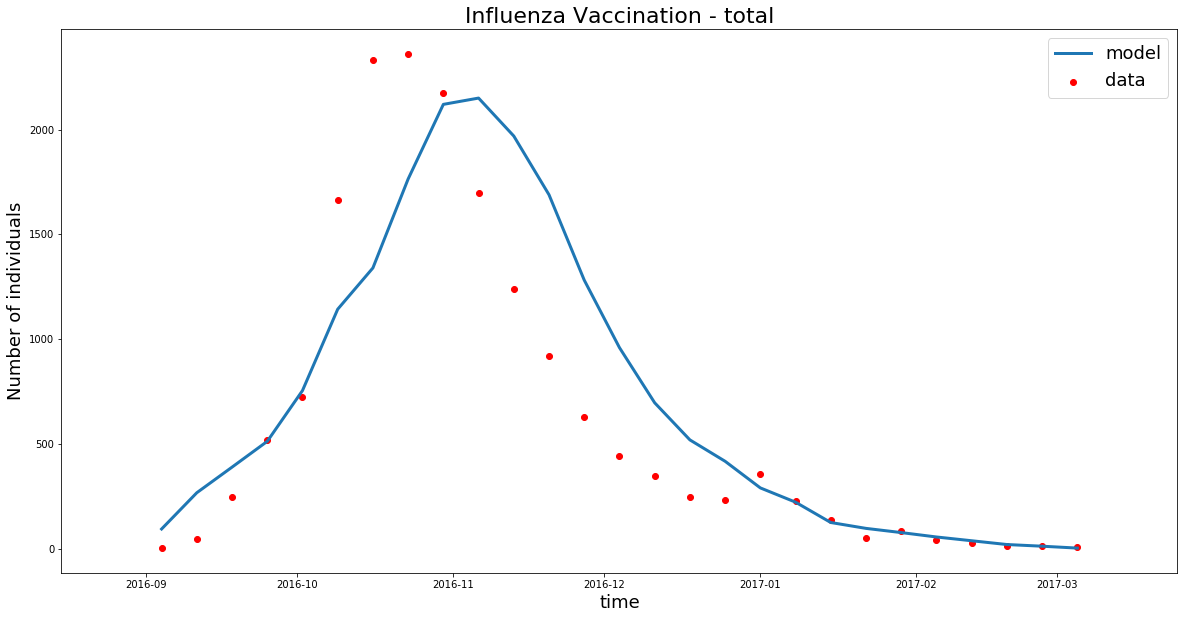

In [8]:
model.plot_aggregated_fit(model_results, data_for_fit)
# model.plot_aggregated_fit(model_results, data_for_fit, age=0)
# model.plot_aggregated_fit(model_results, data_for_fit, age=1)

# model.plot_vacc_coverage_by_age(model_results, data_for_fit, prep_data)

# model.plot_vacc_coverage(model_results, prep_data)

# model.plot_fit_by_subdist_vaccination(model_results, data_for_fit, prep_data)

#### Median realization

In [12]:
model_results_list = [model.run_model(parameters, prep_data) for i in range(15)]

In [13]:
# Calculate likelihood
model_res_likelihood_list = [model.log_likelihood_agg_by_subdist(res['lambdas'], data_for_fit['data_for_fit_subdist'], prep_data)
                             for res in model_results_list]

# Get median realization
med = np.argsort(np.array(model_res_likelihood_list))[len(model_res_likelihood_list)//2]
median_model_results = model_results_list[med]

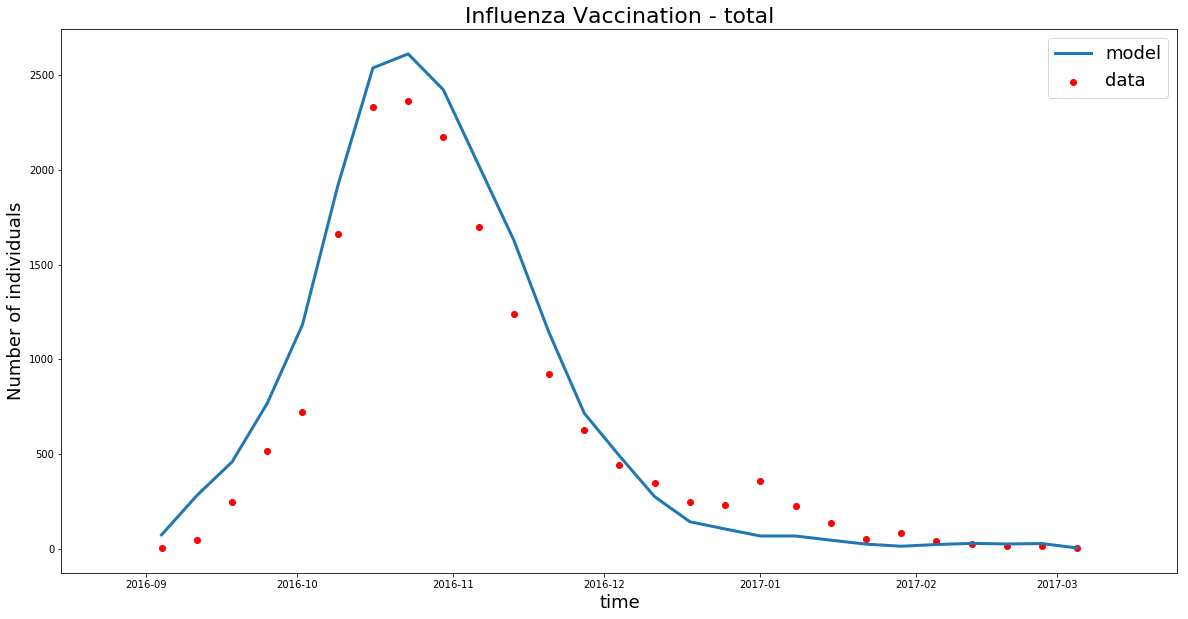

In [16]:
model.plot_aggregated_fit(median_model_results, data_for_fit)
# model.plot_aggregated_fit(median_model_results, data_for_fit, age=0)
# model.plot_aggregated_fit(median_model_results, data_for_fit, age=1)

In [22]:
print(f'correlation fit aggregated: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data)[0]:.2f}')
print(f'correlation fit by subdist: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data, by_subdist=True)[0]:.2f}')
print(f'correlation fit by subdist and age: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data, by_subdist_age=True)[0]:.2f}')

correlation fit aggregated: 0.99
correlation fit by subdist: 0.93
correlation fit by subdist and age: 0.89


In [5]:
# Get list of files
file_names = os.listdir('L:/Dor/Data/vaccination_model/model_results')

# Merge lists
model_results_all = []
for file_name in file_names:
    with open(f'L:/Dor/Data/vaccination_model/model_results/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_all.extend(cur_res)

In [7]:
model_results_list = [res['model_results'] for res in model_results_all]
model_res_likelihood_list = [res['likelihood'] for res in model_results_all]

In [8]:
# Get median realization
med = np.argsort(np.array(model_res_likelihood_list))[len(model_res_likelihood_list)//2]
median_model_results = model_results_list[med]

In [11]:
print(f'correlation fit aggregated: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data):.2f}')
print(f'correlation fit by subdist: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data, by_subdist=True):.2f}')
print(f'correlation fit by subdist and age: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit, prep_data, by_subdist_age=True):.2f}')

correlation fit aggregated: 0.95
correlation fit by subdist: 0.84
correlation fit by subdist and age: 0.81


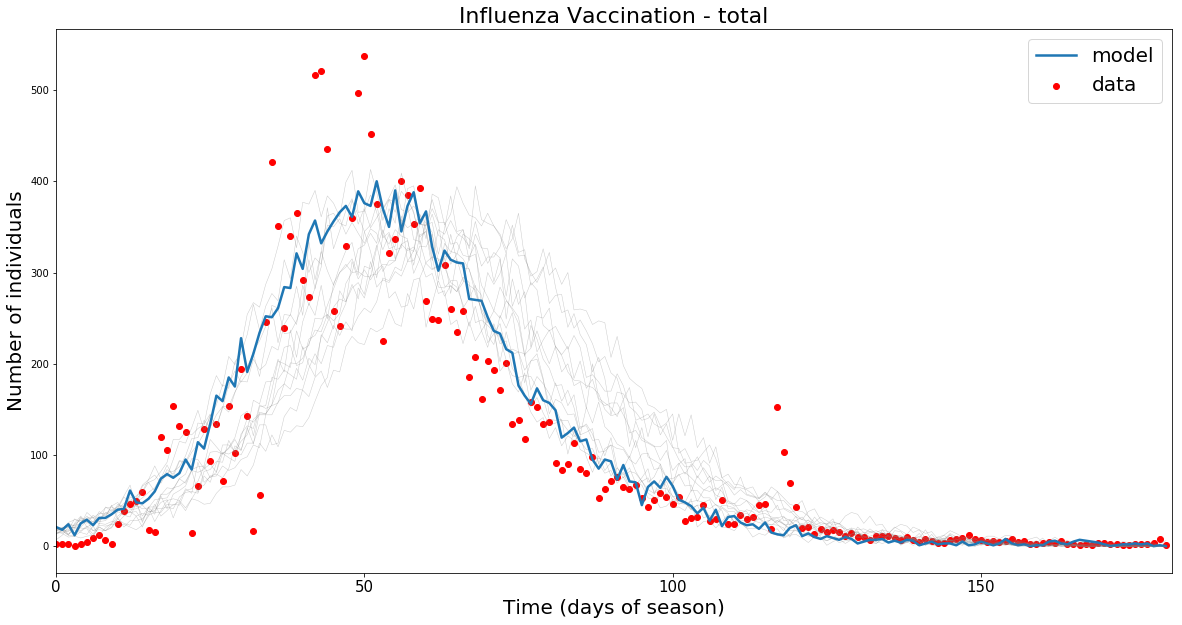

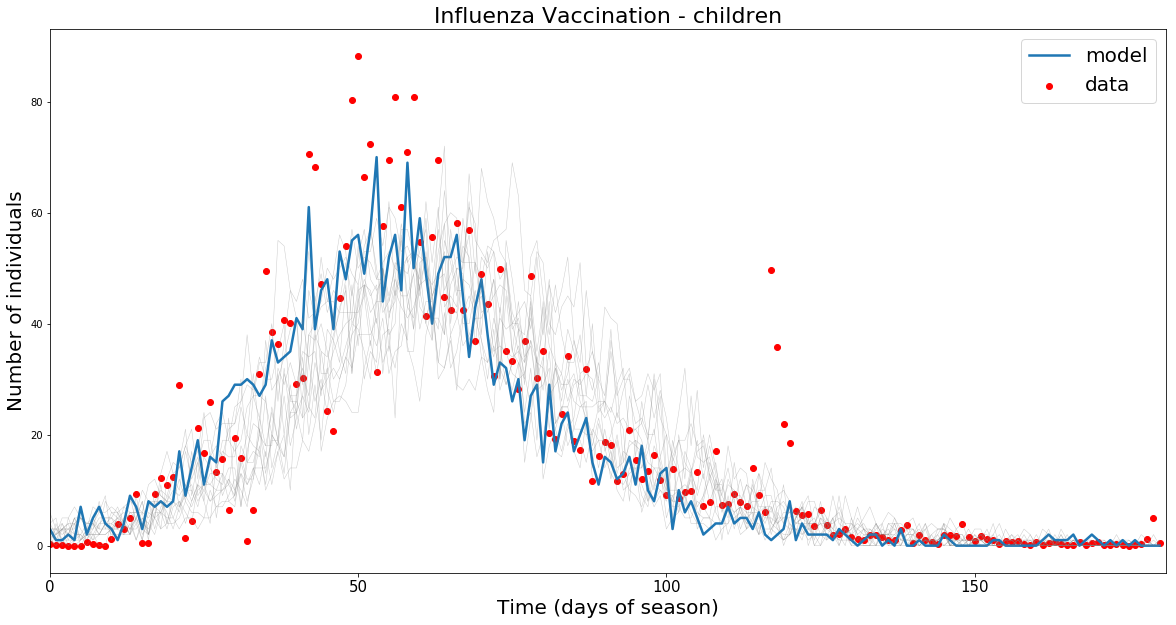

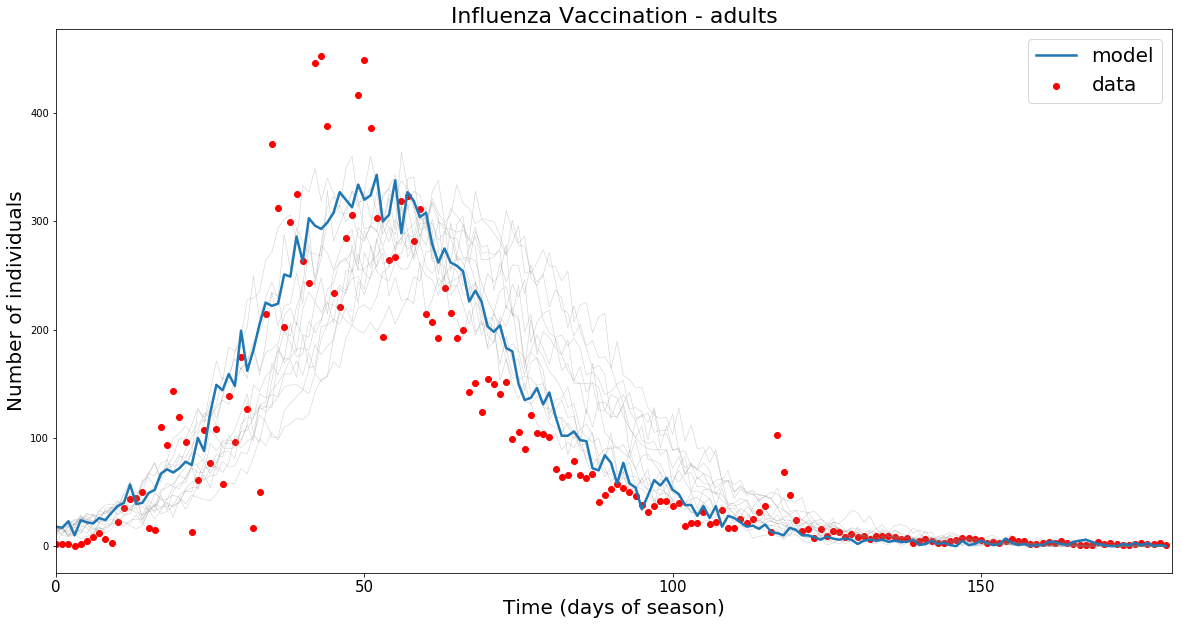

In [13]:
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list, data_for_fit, prep_data, likelihood_by='subdist')
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list, data_for_fit, prep_data, likelihood_by='subdist', age=0)
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list, data_for_fit, prep_data, likelihood_by='subdist', age=1)

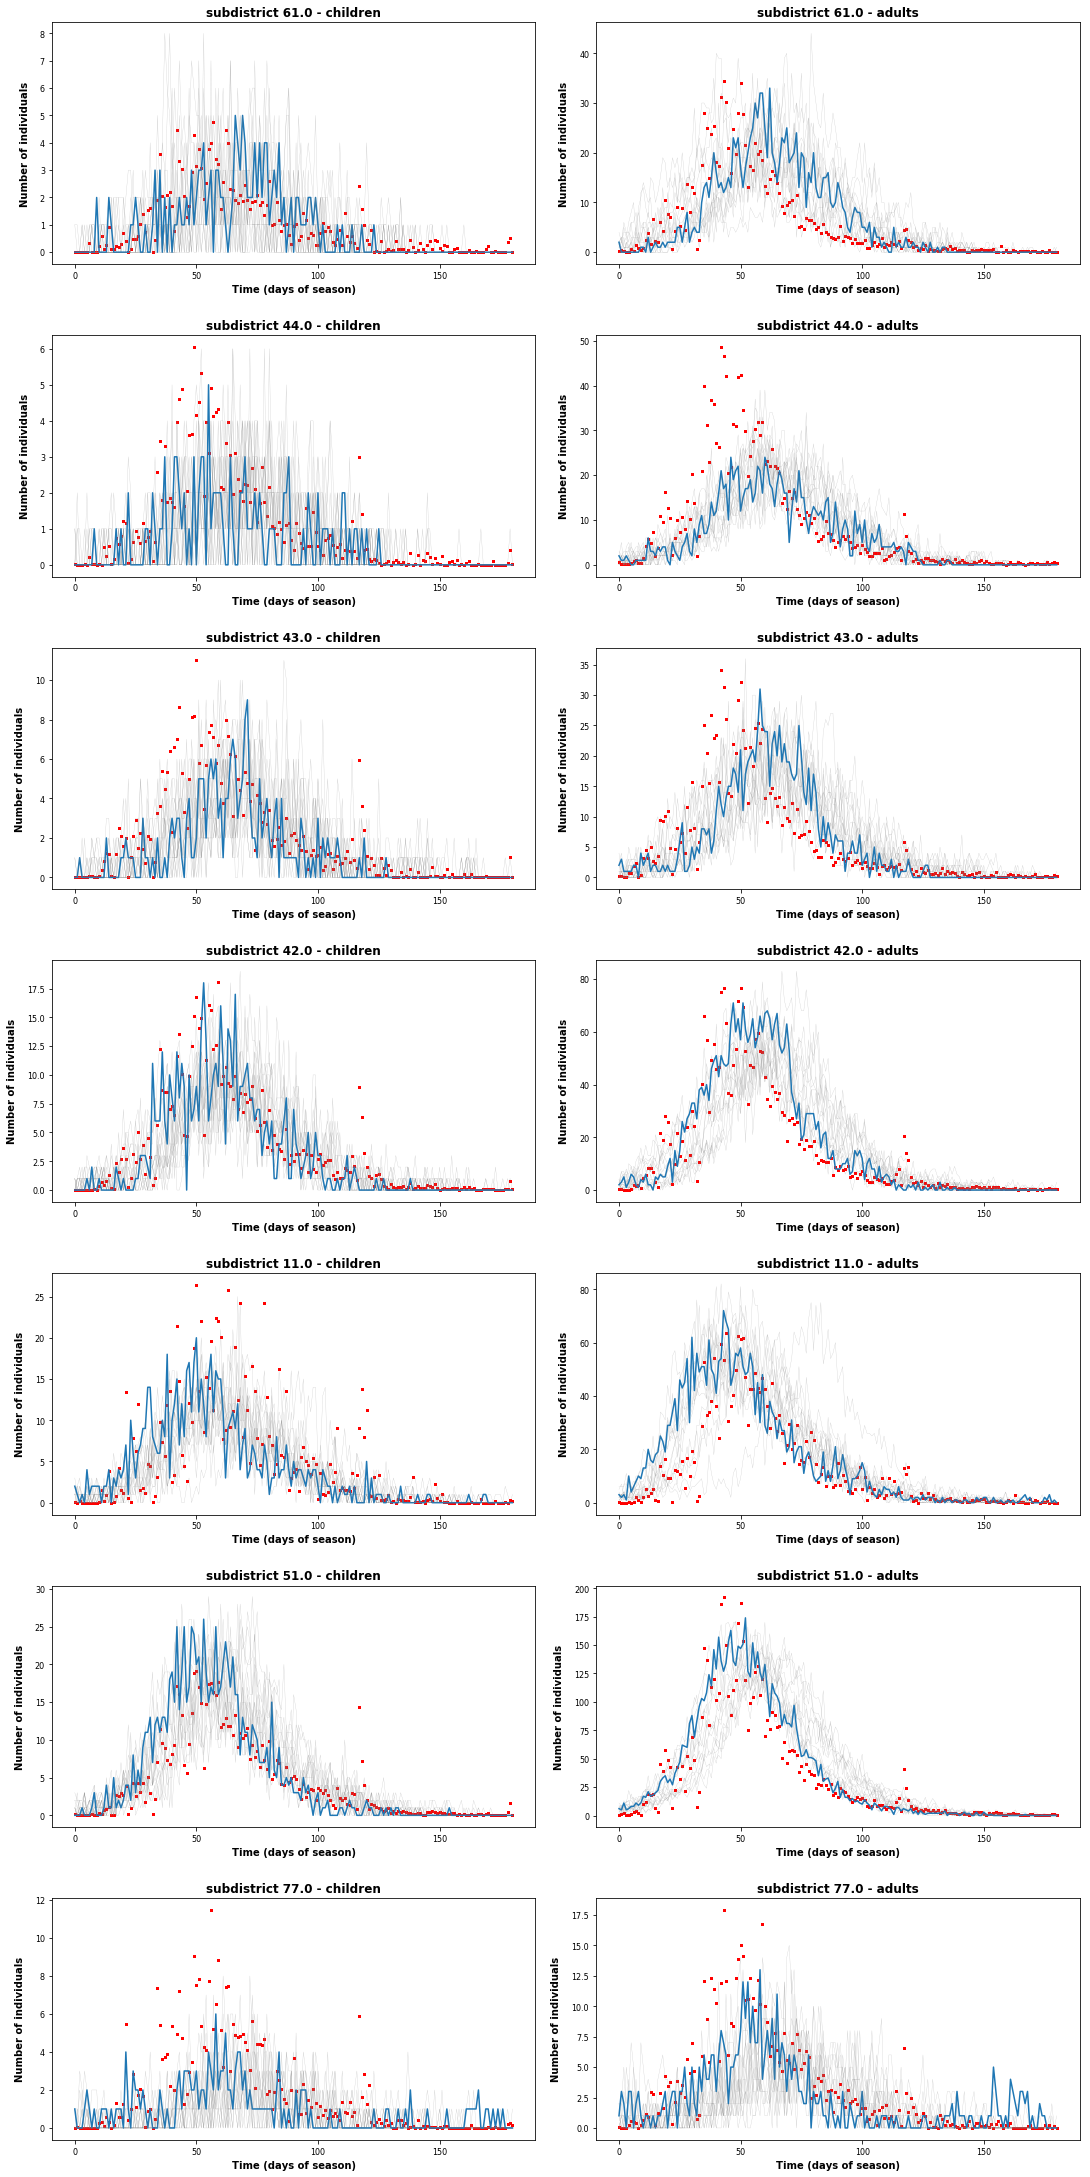

In [14]:
model.plot_fit_by_subdist_with_cloud_vaccination(model_results_list, data_for_fit, prep_data, likelihood_by='subdist')
# model_results_list = []

In [15]:
log_like = model.log_likelihood(median_model_results['lambdas'], data_for_fit['data_for_fit'])
log_like_age = model.log_likelihood_agg_with_age(median_model_results, data_for_fit)
log_like_subdist = model.log_likelihood_agg_by_subdist(median_model_results['lambdas'], data_for_fit['data_for_fit_subdist'],
                                                           prep_data)

print(f'log-liklihood: {int(log_like):,d}')
print(f'log-liklihood by age: {int(log_like_age):,d}')
print(f'log-liklihood by subdist: {int(log_like_subdist):,d}')

log-liklihood: -10,480
log-liklihood by age: 69,539
log-liklihood by subdist: 35,851


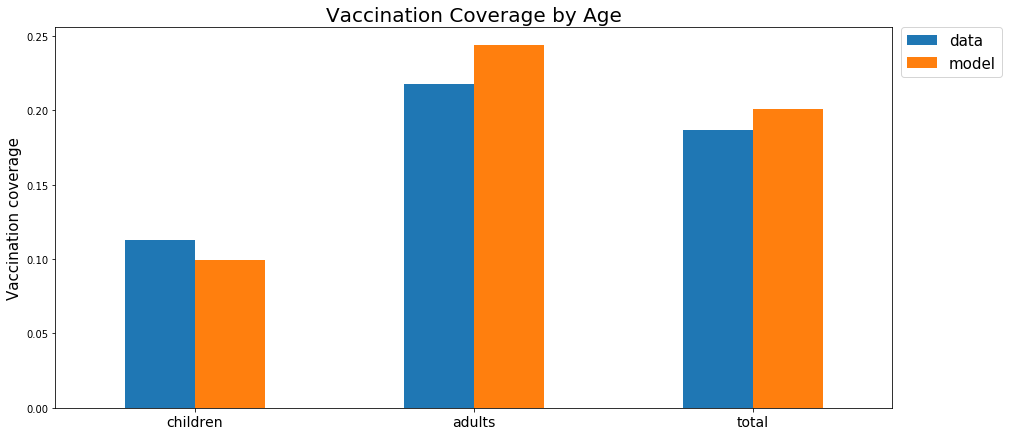

In [16]:
model.plot_vacc_coverage_by_age(median_model_results, data_for_fit, prep_data)

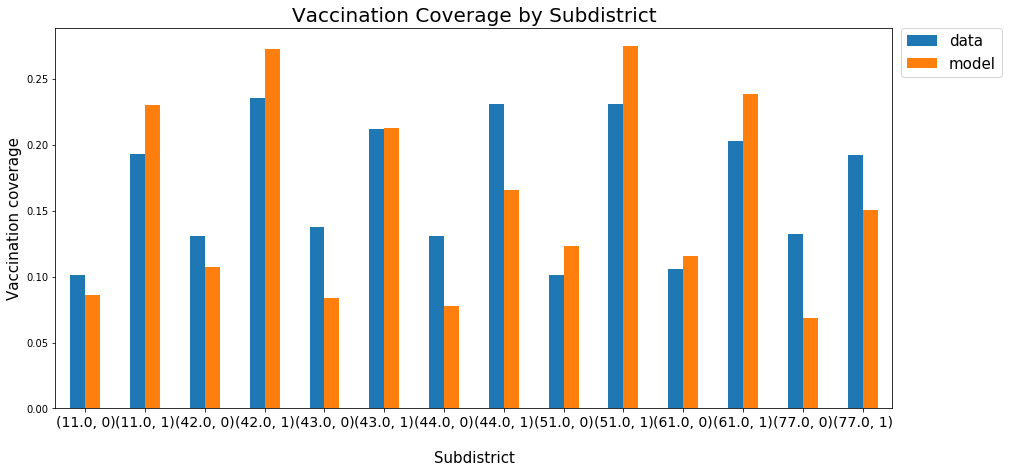

In [17]:
model.plot_vacc_coverage(median_model_results, prep_data)

## Homogenous model

In [4]:
with open('L:/Dor/Data/vaccination_model/grid_search/grid_search_res_homo.pickle', 'rb') as pickle_in:
    grid_search_res_homo = pickle.load(pickle_in)

In [6]:
# Max likelihood age
liklihood_age_homo = max(grid_search_res_homo, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_age_homo['log_likelihood_subdist']):,d}")
print(liklihood_age_homo)

Max likelihood by subdist: 64,030
{'parameters': {'beta': 8.655725758096305e-06, 'delta': 0.5215131068870331, 'gamma': 0.39114010315182385, 'I_0_size': 0.001}, 'log_likelihood_subdist': 64030.963005722035}


In [20]:
# liklihood_age_homo['parameters']['beta'] = 0.0000058
# liklihood_age_homo['parameters']['delta'] = 0.5
# liklihood_age_homo['parameters']['I_0_size'] = 0.0008

In [17]:
print(f'{8e-6:.10f}')

0.0000080000


In [9]:
data_for_fit = model.create_data_for_fit(prep_data)

In [43]:
homo_par = {'beta': 0.000008-0.000008/20, 'delta': 0.56, 'gamma': 0.36, 'I_0_size': 0.001}

#### Single run

In [7]:
homo_par = liklihood_age_homo['parameters']

In [8]:
model_results_homo = model.run_model(homo_par, prep_data, homogenous=True)

In [9]:
log_like_subdist_homo = model.log_likelihood_agg_by_subdist(model_results_homo['lambdas'], data_for_fit['data_for_fit_subdist'],
                                                           prep_data)

print(f'log-liklihood by subdist: {int(log_like_subdist_homo):,d}')

log-liklihood by subdist: 62,193


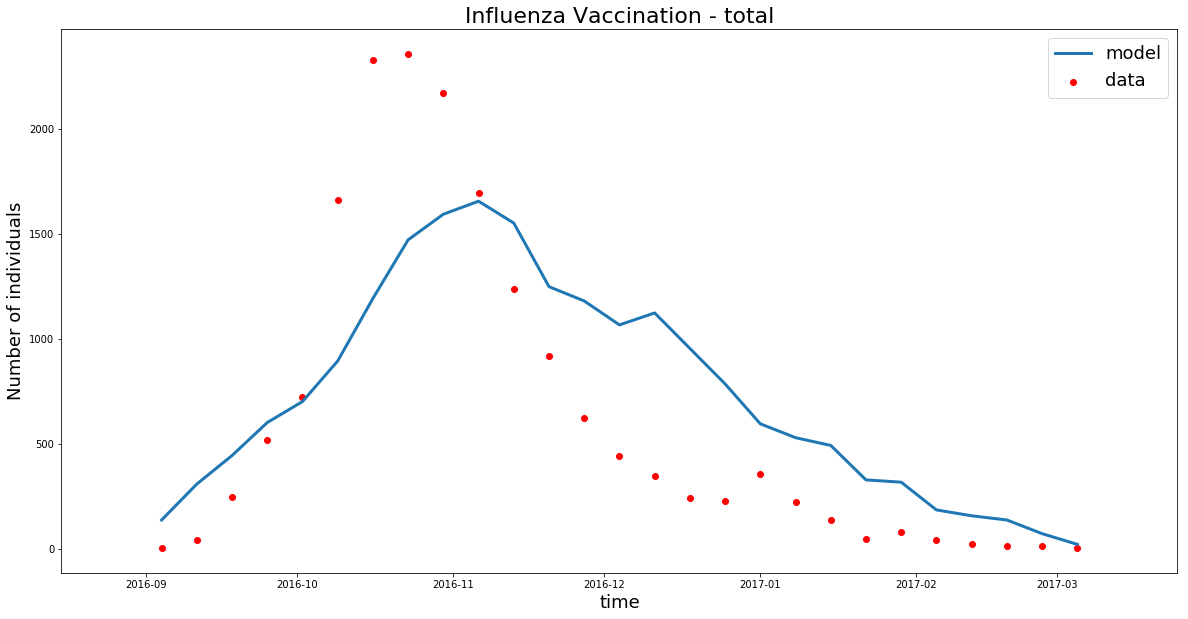

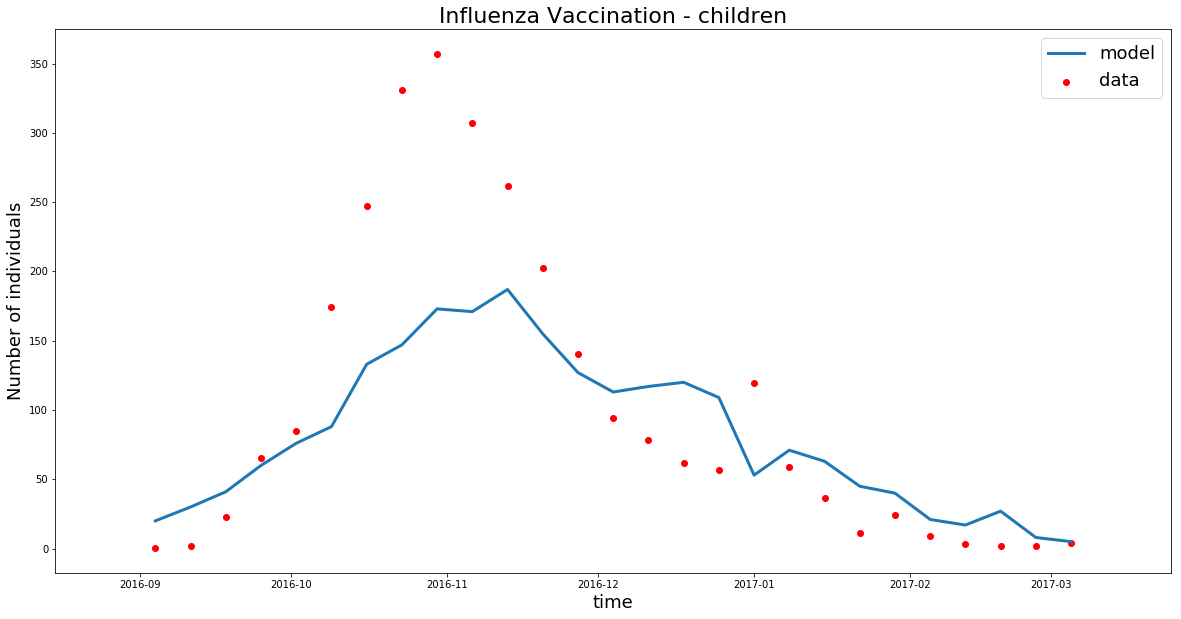

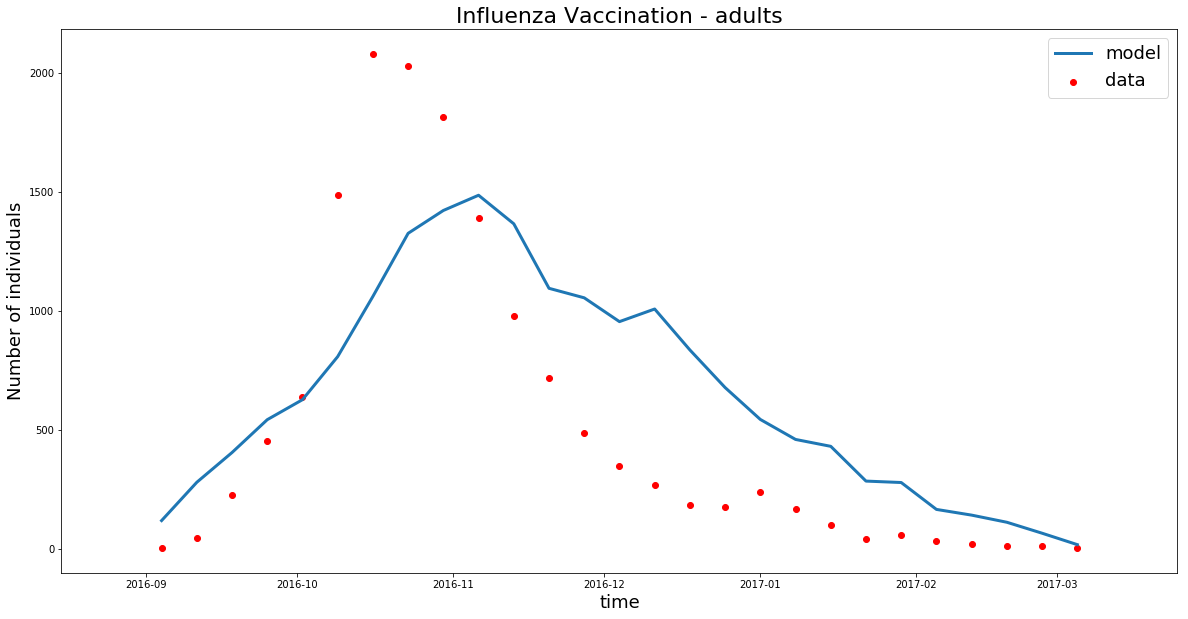

In [10]:
model.plot_aggregated_fit(model_results_homo, data_for_fit, homogenous=False)
model.plot_aggregated_fit(model_results_homo, data_for_fit, age=0, homogenous=False)
model.plot_aggregated_fit(model_results_homo, data_for_fit, age=1, homogenous=False)

# model.plot_vacc_coverage_by_age(model_results_homo, data_for_fit, prep_data)

# model.plot_vacc_coverage(model_results_homo, prep_data)

# model.plot_fit_by_subdist_vaccination(model_results_homo, data_for_fit, prep_data)

#### Median realization

In [24]:
parameters_homo = liklihood_age_homo['parameters']

model_results_list_homo = [model.run_model(parameters_homo, prep_data, homogenous=True) for i in range(15)]

In [25]:
# Calculate likelihood
model_res_likelihood_list_homo = [model.log_likelihood_agg_with_age(res, data_for_fit) for res in model_results_list_homo]

# Get median realization
med_homo = np.argsort(np.array(model_res_likelihood_list_homo))[len(model_res_likelihood_list_homo)//2]
median_model_results_homo = model_results_list_homo[med_homo]

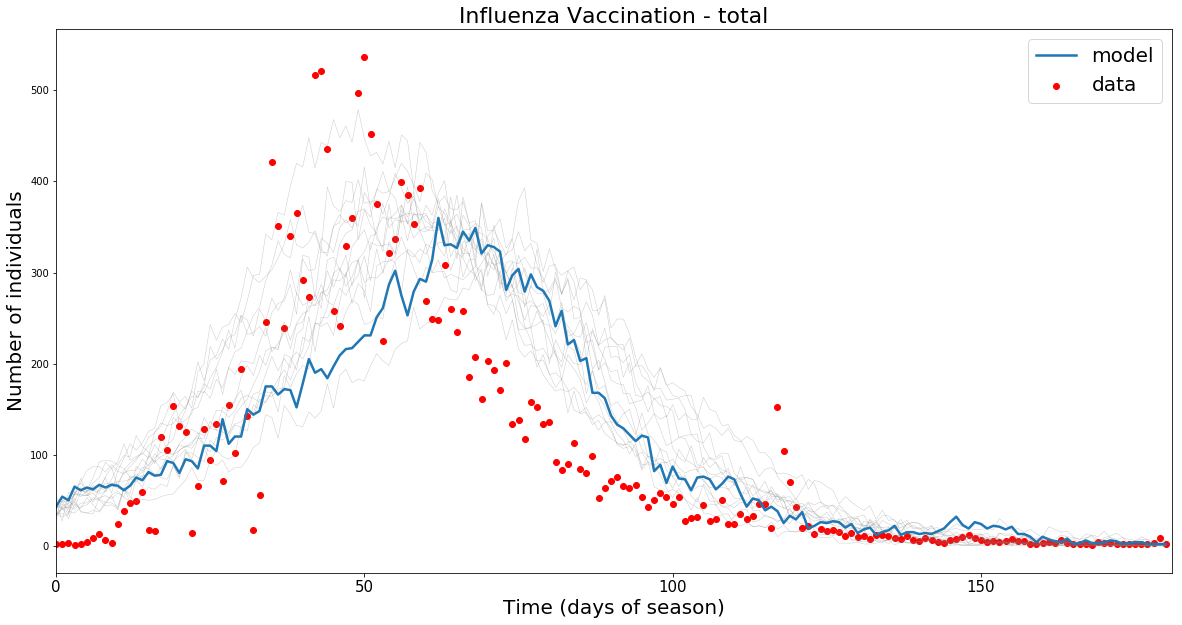

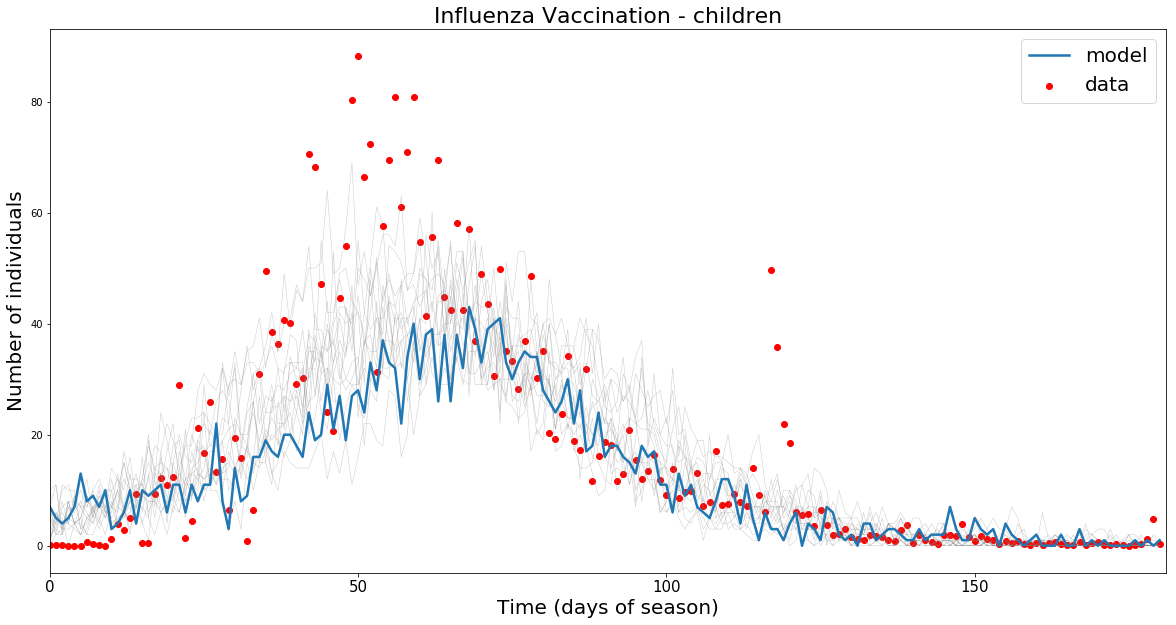

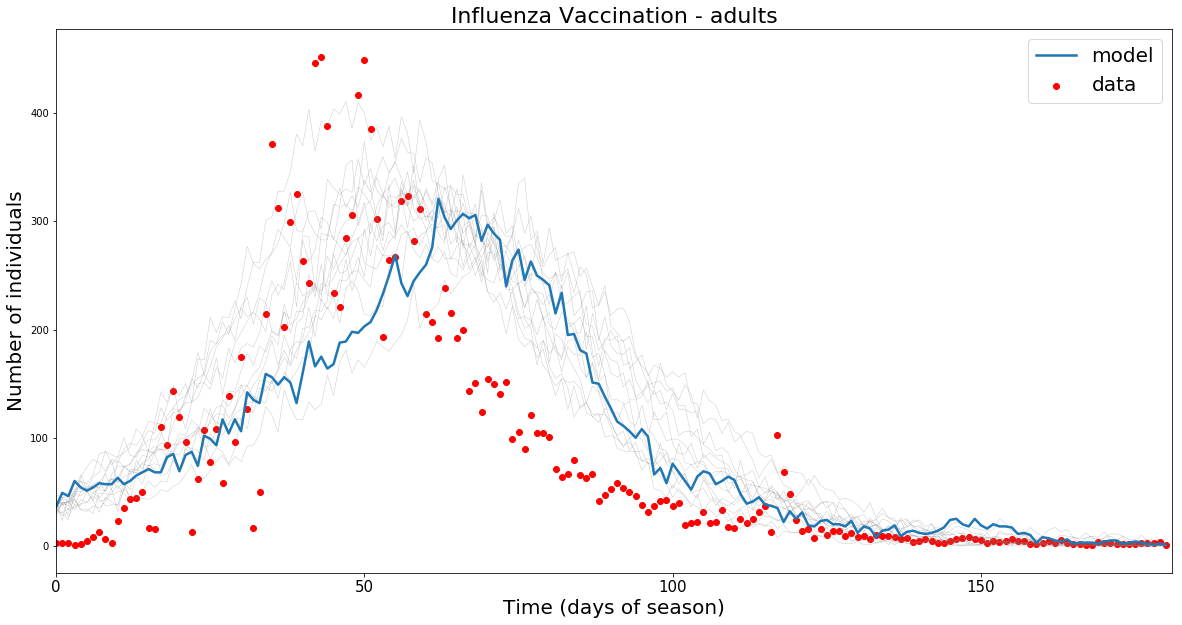

In [26]:
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list_homo, data_for_fit, prep_data, likelihood_by='subdist')
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list_homo, data_for_fit, prep_data, likelihood_by='subdist', age=0)
model.plot_aggregated_fit_with_cloud_vaccination(model_results_list_homo, data_for_fit, prep_data, likelihood_by='subdist', age=1)

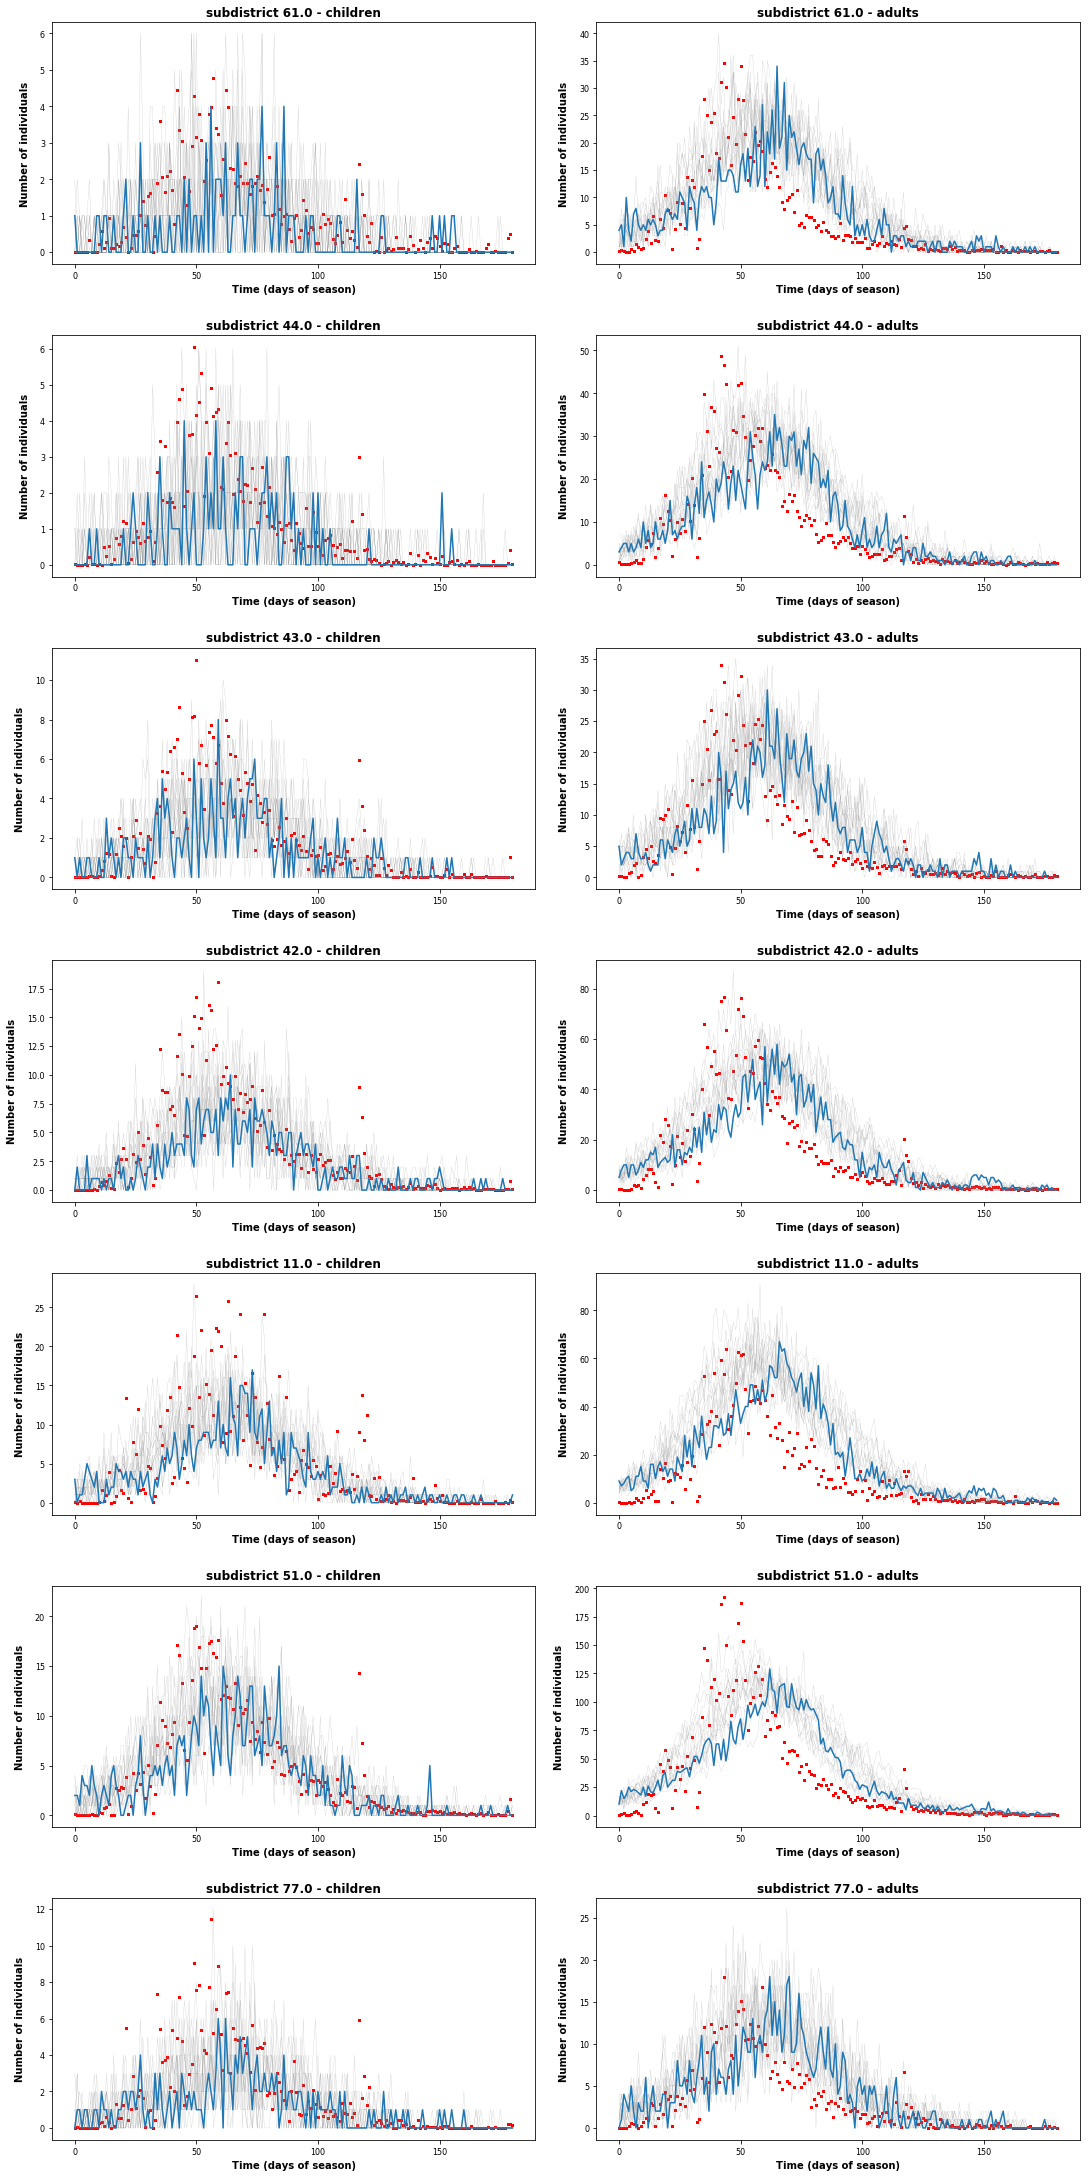

In [27]:
model.plot_fit_by_subdist_with_cloud_vaccination(model_results_list_homo, data_for_fit, prep_data, likelihood_by='subdist')
# model_results_list = []

In [28]:
log_like_age_homo = model.log_likelihood_agg_with_age(median_model_results_homo, data_for_fit)

print(f'log-liklihood by age: {int(log_like_age_homo):,d}')

log-liklihood by age: 67,016


In [29]:
log_like_homo = model.log_likelihood(median_model_results_homo['lambdas'], data_for_fit['data_for_fit'])
log_like_age_homo = model.log_likelihood_agg_with_age(median_model_results_homo, data_for_fit)
log_like_subdist_homo = model.log_likelihood_agg_by_subdist(median_model_results_homo['lambdas'], data_for_fit['data_for_fit_subdist'],
                                                           prep_data)

print(f'log-liklihood: {int(log_like_homo):,d}')
print(f'log-liklihood by age: {int(log_like_age_homo):,d}')
print(f'log-liklihood by subdist: {int(log_like_subdist_homo):,d}')

log-liklihood: -7,804
log-liklihood by age: 67,016
log-liklihood by subdist: 35,423


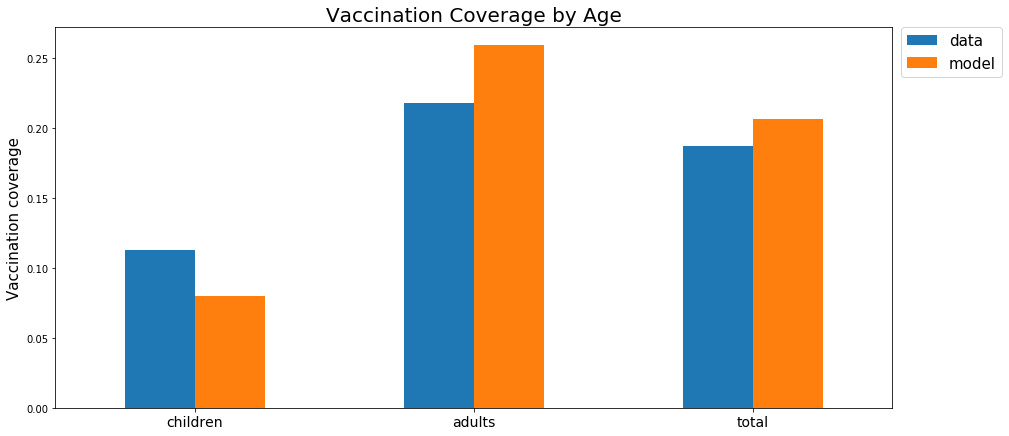

In [30]:
model.plot_vacc_coverage_by_age(median_model_results_homo, data_for_fit, prep_data)

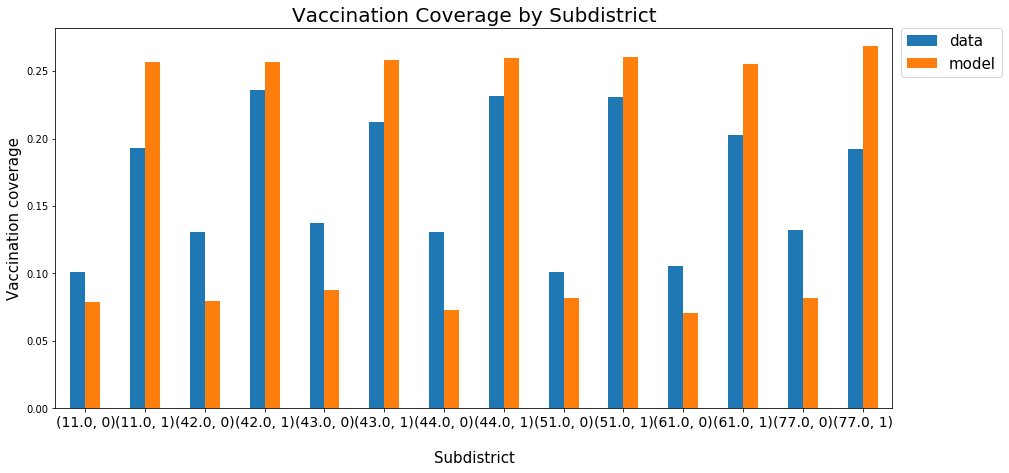

In [31]:
model.plot_vacc_coverage(median_model_results_homo, prep_data)

## Model Comparison

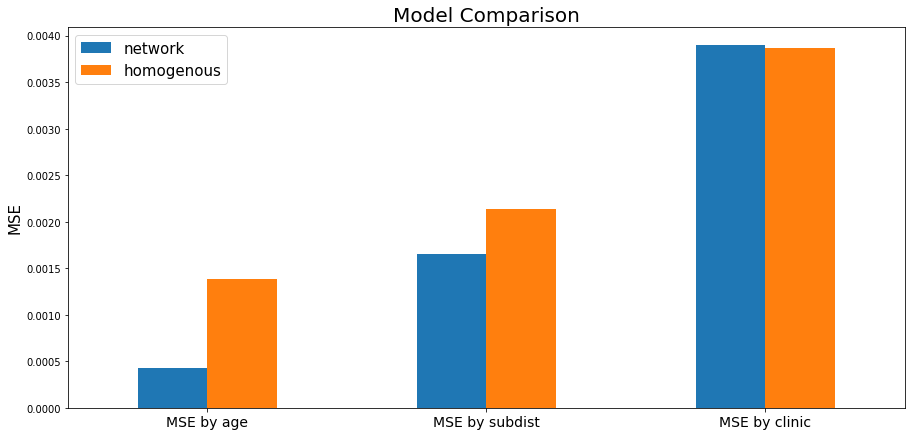

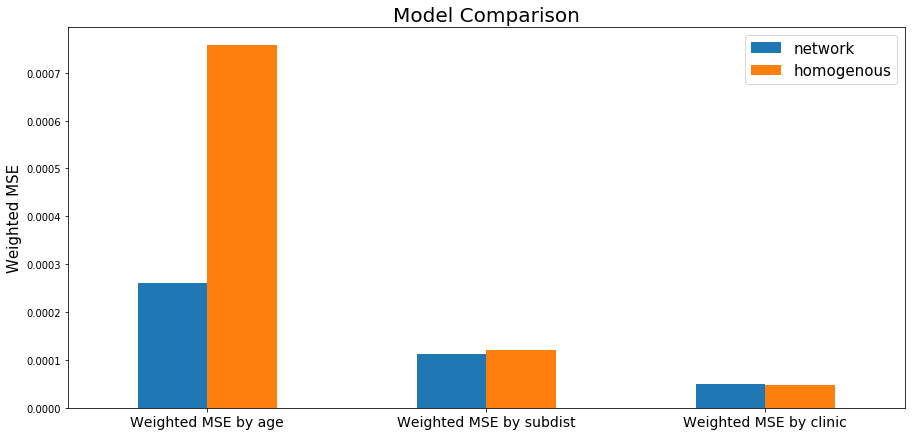

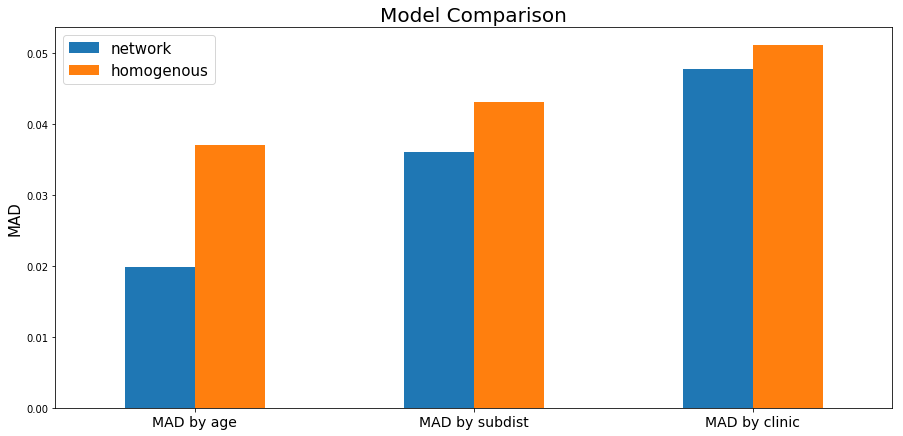

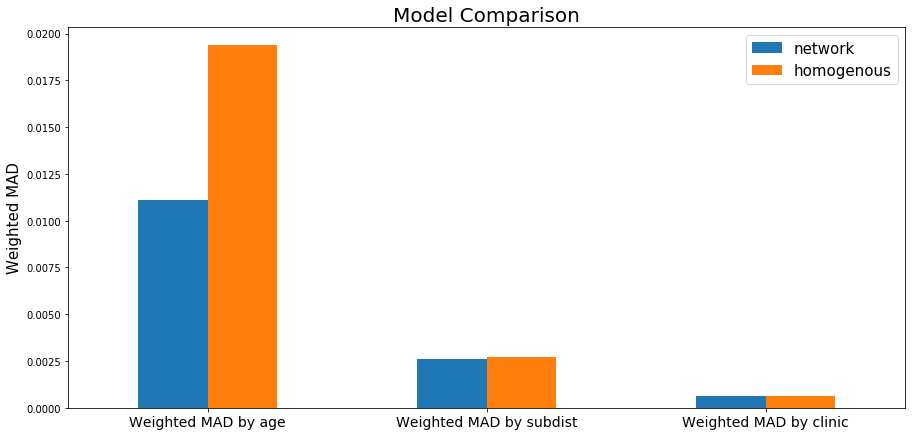

In [32]:
results = [median_model_results, median_model_results_homo]
measures = ['MSE', 'Weighted MSE', 'MAD', 'Weighted MAD']

for measure in measures:
    model.plot_model_comparison_vaccination(results, data_for_fit, prep_data, measure)

In [33]:
errors = model.model_comparison_vaccination(results, data_for_fit, prep_data, measures)
errors

,network,homogenous
MSE by age,0.000426,0.001388
MSE by subdist,0.001657,0.002138
MSE by clinic,0.003894,0.003866
Weighted MSE by age,0.000262,0.000757
Weighted MSE by subdist,0.000112,0.000120
Weighted MSE by clinic,0.000050,0.000048
MAD by age,0.019759,0.037031
MAD by subdist,0.035950,0.043095
MAD by clinic,0.047688,0.051015
Weighted MAD by age,0.011109,0.019366
